# Convolution Neural Network on the Skin cancer images

Importing the libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

Reading the data 

In [4]:

# Preprocessing the Training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
training_set = train_datagen.flow_from_directory(
    'train',
    target_size=(128, 128),  # Adjusting image size
    batch_size=32,
    class_mode='binary'
)

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'validation',
    target_size=(128, 128),  # Adjusting image size
    batch_size=32,
    class_mode='binary'
)

Found 300 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


## Building the model

In [5]:
# Initialising the CNN
cnn = Sequential()

# Step 1 - Convolution
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))

# Step 2 - Pooling
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full Connection
cnn.add(Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(Dense(units=1, activation='sigmoid'))


Compiling

In [6]:
# Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

Training

In [8]:
# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=25
)


Epoch 1/25
10/10 [==============================] - 6s 607ms/step - loss: 1.0732 - accuracy: 0.5367 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 2/25
10/10 [==============================] - 6s 565ms/step - loss: 0.6721 - accuracy: 0.5000 - val_loss: 0.6677 - val_accuracy: 0.5000
Epoch 3/25
10/10 [==============================] - 6s 603ms/step - loss: 0.5948 - accuracy: 0.6800 - val_loss: 0.6363 - val_accuracy: 0.5200
Epoch 4/25
10/10 [==============================] - 6s 569ms/step - loss: 0.4919 - accuracy: 0.7667 - val_loss: 0.5588 - val_accuracy: 0.6900
Epoch 5/25
10/10 [==============================] - 5s 557ms/step - loss: 0.4637 - accuracy: 0.7733 - val_loss: 0.6115 - val_accuracy: 0.7200
Epoch 6/25
10/10 [==============================] - 5s 540ms/step - loss: 0.4670 - accuracy: 0.7767 - val_loss: 0.4691 - val_accuracy: 0.7900
Epoch 7/25
10/10 [==============================] - 6s 574ms/step - loss: 0.4144 - accuracy: 0.8100 - val_loss: 0.5028 - val_accuracy: 0.7400
Epoch 

Visualization



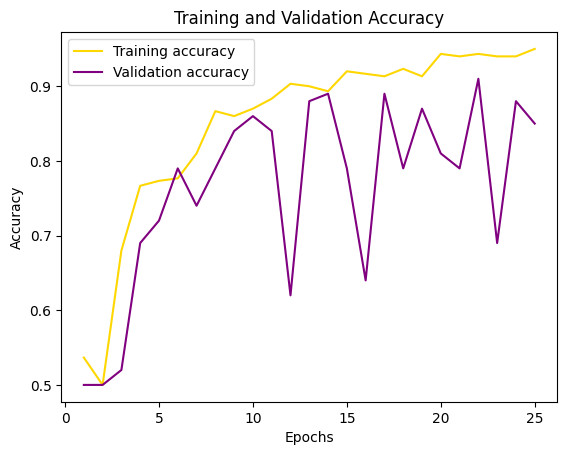

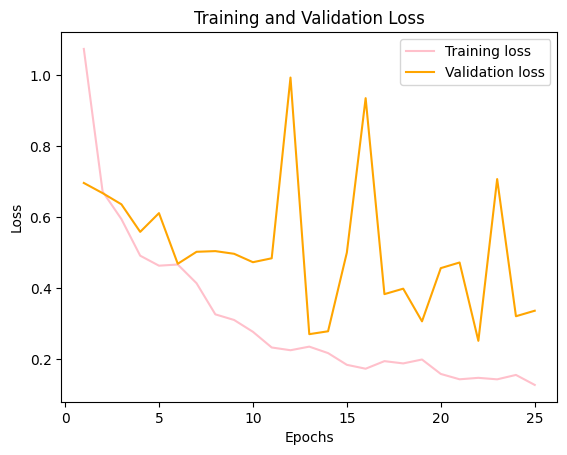

In [9]:
import matplotlib.pyplot as plt

# Accessing the history object from model training
history_dict = cnn.history.history

# Extracting accuracy and validation accuracy
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Extracting loss and validation loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting accuracy
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'gold', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'purple', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(epochs, loss, 'pink', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Prediction 

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))  # Adjust target size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = cnn.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Malignant"
    else:
        return "Benign"

# Example usage
single_image_path = 'ISIC_0330896.JPG'  # Replace with your image path
prediction_result = predict_single_image(single_image_path)
print(f"The tumor in the single image is predicted as {prediction_result}.")


1/1 [==============================] - 0s 59ms/step
The tumor in the single image is predicted as Malignant.


In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))  # Adjust target size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = cnn.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Malignant"
    else:
        return "Benign"

# Example usage
single_image_path = 'ISIC_5309744.JPG'  # Replace with your image path
prediction_result = predict_single_image(single_image_path)
print(f"The tumor in the single image is predicted as {prediction_result}.")


1/1 [==============================] - 0s 13ms/step
The tumor in the single image is predicted as Benign.
